## Multiclass classification Tutorial: Iris dataset

### Loading required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

### Settting some display settings

In [2]:
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.2f}'.format

The code above will suppress scientific notation & display floating numbers rounded to 2 decimal places. 

### Loading the data

In [3]:
df = pd.read_csv('C:\\Users\\5030675\\Downloads\\iris.csv',names=['sepal_length','sepal_width','petal_length','petal_width','class'])

#### Let us see what the data looks like.

In [4]:
df.head()

sepal_length  sepal_width  petal_length  petal_width        class
0          5.10         3.50          1.40         0.20  Iris-setosa
1          4.90         3.00          1.40         0.20  Iris-setosa
2          4.70         3.20          1.30         0.20  Iris-setosa
3          4.60         3.10          1.50         0.20  Iris-setosa
4          5.00         3.60          1.40         0.20  Iris-setosa

#### Let us look at the data types, memory usage , names & number of non-null entries in the data columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Looking at the info, we get a broad view of how the columns are. There are just 5 columns & 4 of the columns are float & one of them is object.
Infact the object type column is the target variable which we are trying to predict.

Also, none of the columns have any missing values.

And we found all this out, by just one simple line of code.

#### Shape of the data

In [6]:
df.shape

(150, 5)

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

#### Let us look at the distribution of the numeric variables

In [8]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count        150.00       150.00        150.00       150.00
mean           5.84         3.05          3.76         1.20
std            0.83         0.43          1.76         0.76
min            4.30         2.00          1.00         0.10
25%            5.10         2.80          1.60         0.30
50%            5.80         3.00          4.35         1.30
75%            6.40         3.30          5.10         1.80
max            7.90         4.40          6.90         2.50

__Skewness__

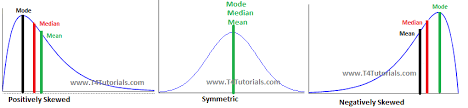

In [9]:
df.skew()

sepal_length    0.31
sepal_width     0.33
petal_length   -0.27
petal_width    -0.10
dtype: float64

__Kurtosis__
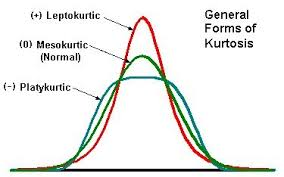

In [10]:
df.kurtosis()

sepal_length   -0.55
sepal_width     0.29
petal_length   -1.40
petal_width    -1.34
dtype: float64

## Problem Statement

This dataset contains information about flowers like sepal length, sepal width, petal length & petal width.

Using these features we want to predict the species of the flower.

So this becomes a <font color = 'blue'>__classification problem__</font>.

#### Let us inspect the column class

In [11]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

So there are three kinds of category. Hence it is <font color = 'blue'>__multiclass classification probelm__</font>.

For ease of use, we create a list containing the names of all these categories. We will call this list as *__class_labels__*.

In [12]:
class_labels = list(df['class'].unique())

To look at the distribution of a variable, one can use the function *__value_counts( )__*. It gives you the count of each category in the categorical variable

In [13]:
df['class'].value_counts( )

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

Sometimes, you might be interested in the percentage distribtution of a variable, in which case, you just need to add the parameter *__normalize = True__* to value_counts( ) function.

You can see that the class is equally distributed. Such a dataset is called <font color = 'blue'>__balanced dataset__. </font>If the distribution of the classes is not uniform, infact when one class is in majority( like 90%) & the minority class forms only 10% of the population, the dataset is called an <font color = 'blue'>__imbalanced dataset__.

In [14]:
df['class'].value_counts(normalize = True)

Iris-setosa       0.33
Iris-versicolor   0.33
Iris-virginica    0.33
Name: class, dtype: float64

## Visualizing the data

#### We will start by doing some basic visualizations using Boxplots

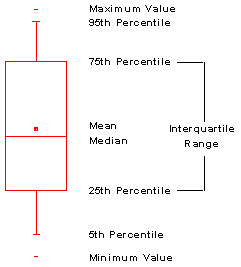

A boxplot shows the distribution of a numeric variable. The figure above shows the distribution exactly. The Minimum value & the maximum value in the figure are considered as <font color = 'blue'>__outliers__ </font> beacuse they do not lie within most of the distribution.

#### Let us plot boxplots for all numeric variables

In [16]:
list(df.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

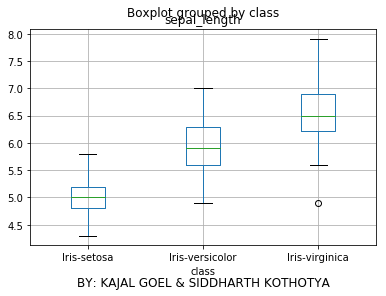

In [21]:
df.boxplot(column='sepal_length',by='class')
txt ='BY: KAJAL GOEL & SIDDHARTH KOTHOTYA'
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

Here we are visualising the distibution of the sepal length for each class.

There is a distinction in distribution of sepal length for the three classes. For setosa,  90% of the sepal length values lie between 4.25 to 5.75 whereas for virgina these values lie vetween 5.6 to 7.9.

Also, we can clearly spot an outlier for the class virginica. 

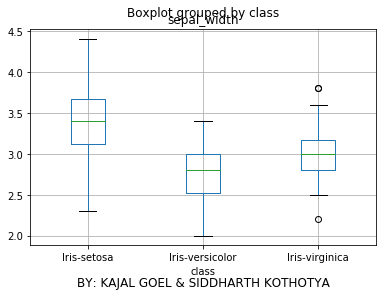

In [22]:
df.boxplot(column='sepal_width',by='class')
txt ='BY: KAJAL GOEL & SIDDHARTH KOTHOTYA'
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

Here again, virginica has outliers for the variable sepal_width

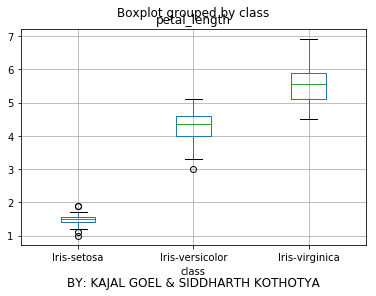

In [23]:
df.boxplot(column='petal_length',by='class')
txt ='BY: KAJAL GOEL & SIDDHARTH KOTHOTYA'
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

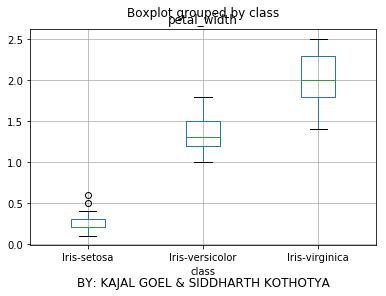

In [24]:
df.boxplot(column='petal_width',by='class')
txt ='BY: KAJAL GOEL & SIDDHARTH KOTHOTYA'
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

Since here only one or two values in each variable are outliers, we do not need to treat them. Otherwise, if the numbers of outliers is a big number, then we need to treat it by replacing it with an appropriate value(for example, median).

### Label Encoding

In this dataset, the target variable which we are trying to classify is not numeric. Will the computer be able to interpret it in this form? No. In order to make it computer interpretable, we need to convert it into numbers.

So we label encode the varibale by assigning each category a distinct number. And the number starts from 0.

sklearn has a module named preprocessing which contains the function __LableEncoder( )__ to do that.

Let's take a look at how it works.

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['class']=label_encoder.fit_transform(df['class'])
list(label_encoder.classes_)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

So, the Label Encoder gives Iris-setosa (0), Iris-versicolor (1) & Iris-virginica (2). 

In [26]:
df['class'].head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int32

In [27]:
df['class'].tail()

145    2
146    2
147    2
148    2
149    2
Name: class, dtype: int32

### Lets look at the distribution for each variable

C:\Users\5030675\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\5030675\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


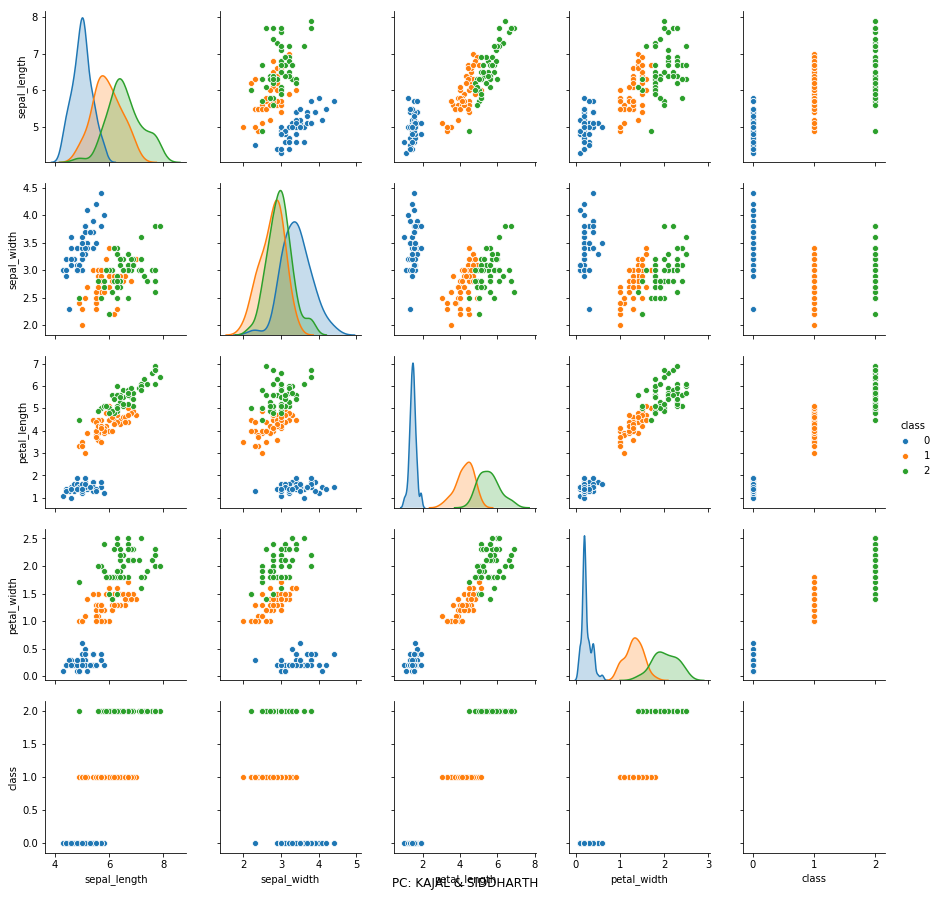

In [28]:
sns.pairplot( df,hue='class')
txt ='PC: KAJAL & SIDDHARTH'
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

A pairplot is used to visualize a lot of varaiables at the same time by plottinmg graphs of the variables one by one.

The graphs on the diagonals represent the distribution of each variable colored by class.
 
The rest of the graphs show the scatter plot of two variables colored by class. You can identify which variables have high correlation class-wise.

This makes this very powerful since through a single line of code, we can visualize a number of numeric variables together with respect to the class in a single go.

#### Let us check out the correlation

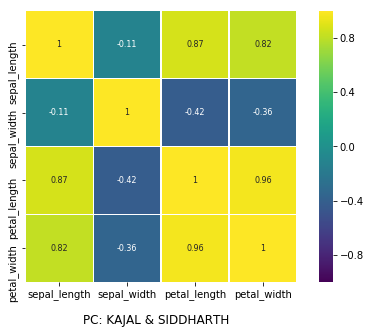

In [29]:
corr = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

# plot the heatmap
plt.rcParams['figure.figsize'] = [8, 5]
sns.heatmap(corr, cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True)
txt ='PC: KAJAL & SIDDHARTH'
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

sepal_length has high positive correlation with petal_length (0.87) & petal_width (0.82).

petal_length has very high positive correlation with petal_width (0.96).

## t-SNE

t-SNE is an unsupervised learning method for visualization, it stands for t-Distributed Stochastic Neighbor Embedding (t-SNE). It maps samples form high dimensional space to 2 or 3 dimention so that they can be visualtized. It is great for inspecting data

In [30]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)

transformed = model.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [31]:
xs = transformed[:,0]
ys = transformed[:,1]

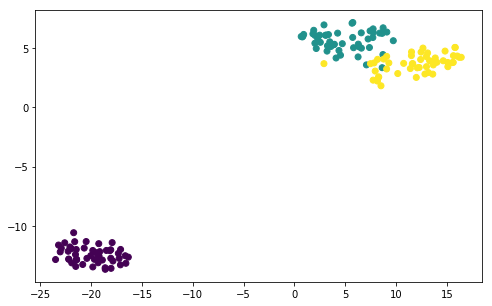

In [32]:
plt.scatter(xs,ys,c=df['class'])

Here we transformed the four columns into just columns using t-sne. On plotting a scatterplots for the two transformed variables, we can see that the three categories have a nice separation, so we can easily classify them.

## Train-test split for modelling

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], y = df['class'],
                                                 test_size=0.3, stratify = df['class'],random_state=18)

Here we split out dataset into train & test, so that we can train the model on training set & then test it on x_test.

sklearn.model_selection has the function __train_test_split( )__, in which you specify x ( independent variables), y(target variable), test_size (proportion of dataset to keep separately to test).

By default, it performs randome sampling. For other sampling types, refer to scikit documentation. 

The argument __stratify__ when set to y makes sure that the distribution of the target varaible remains the same in the original, train & test dataset.

The argurment __random_state__ lets you recreate the same train & test datasets if the seed remains the same. 

In [34]:
x_train.head()

sepal_length  sepal_width  petal_length  petal_width
13          4.30         3.00          1.10         0.10
86          6.70         3.10          4.70         1.50
58          6.60         2.90          4.60         1.30
72          6.30         2.50          4.90         1.50
99          5.70         2.80          4.10         1.30

# Let's try classification

## ---------------------------------- Logistic Regression -----------------------------------

It is a simple yet powerful classification problem. 

It works on __maximum likelihood estimation__ & calculates the __probability of the occurence of an event__. 
The logistic regression classifier has a __non-linear activation function(sigmoid function)__.

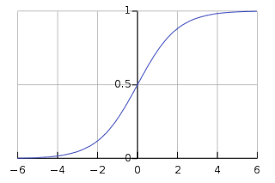

The sigmoid function looks like this. The probability of occurence are plotted on y-axis.This can be converted into an outcome by setting a threshold. For example, all observations with probability greater than 0.5 can be taken as class 0.

In [87]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='auto')

warnings.filterwarnings('ignore')
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

We predict the results using our model for x_test.

In [88]:
y_pred = logreg.predict(x_test)

In [89]:
y_pred[0:5]

array([2, 1, 1, 1, 2])

So, we y_pred contains the predicted classes. But, we might be more useful in the probability of prediction more often. This is done through __predict_proba( )__ function.

In [90]:
y_pred_proba = logreg.predict_proba(x_test)

In [91]:
y_pred_proba[0:5]

array([[0.00001019, 0.18047223, 0.81951758],
       [0.02678115, 0.85742311, 0.11579573],
       [0.00462813, 0.54877523, 0.44659664],
       [0.00053594, 0.55436692, 0.44509714],
       [0.00046946, 0.18590769, 0.81362285]])

This function returns the probability for each class for each observation. For example, for the first observation,  the highest probability is of class 2, & this is the class predicted by model.

Internally, the model first calculates the probability & then sets a __threshold__ limit. If the probablity is greater than the threshold value, it is predicted as the appropriate class.

By default, the threshold for sklearn is 0.5. But we can surely tweak it, according to our requirements.

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9333333333333333

The score function gives accuracy of the model which is the number of classes correctly classified/ all classes.

We can see that out model has 93.33 % accuracy which is pretty great for the start.

## Plotting the results

Here we have created multiple functions. The first function returns __confusion matrix__ along with the class labels.

A confusion matrix is a clean & unambiguous way to present the predictions of a classifier. Here the diagonals give the true values( classified correctly). And the non-diagonal values are false values( classified incorrectly).

In [93]:
def confusion_plot(y_test, y_pred, class_labels):
    from sklearn import metrics
    cm = metrics.confusion_matrix(y_test, y_pred)

    from mlxtend.plotting import plot_confusion_matrix
    plt.rcParams['figure.figsize'] = [5, 5]
    fig, ax = plot_confusion_matrix(conf_mat=cm)
    plt.title('Confusion Matrix\n')
    plt.xticks(range(0,len(class_labels)), class_labels)
    plt.yticks(range(0,len(class_labels)), class_labels)
    plt.show()

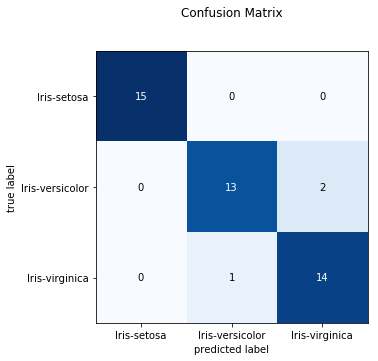

In [94]:
confusion_plot(y_test, y_pred, class_labels)

Through this figure, we can clearly see that most of observations are correctly classified.

The second function plots the __classification report__ which displays precision, recall & f1 score for each class.

- __Precision__ : _Positive predicted value_, i.e. True positives out of all values that are predicted as positive

- __Recall__ : _Sensitivity_, i.e. True positives out of all actual positives

- __F1-score__ : Balance between precision & recall. Harmonic mean of both.

The closer these values are to 1, the better the model.

sklearn has the function __classification_report( )__ to give this in a text format. It is saved as a text.

But to make it visually appealing & more easier to look at, we have created a plot where it is colored according to the intensity of the values.

In [101]:
def classification_report_plot( y_test, y_pred):
    from sklearn.metrics import classification_report
    classificationreport = classification_report(y_test, y_pred)
    print("CLASSIFICATION REPORT\n\n", classificationreport)

    lines = classificationreport.split('\n')
    classes = []
    matrix = []

    for line in lines[2:(len(lines) - 5)]:
        s = line.split()
        classes.append(s[0])
        value = [float(x) for x in s[1: len(s) - 1]]
        matrix.append(value)

    plt.title('Classification Report\n')
    sns.heatmap(matrix, cmap='viridis', vmax=1.0, vmin=0, linewidths=0.1, annot=True, annot_kws={"size": 8},
                square=True)
    plt.xticks([0.5, 1.5, 2.5], ['precision', 'recall', 'f1-score'])
    plt.yticks(range(0, len(class_labels)), class_labels)
    plt.xlabel('Measures')
    plt.ylabel('Classes')
    plt.show()

CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.88      0.93      0.90        15

   micro avg       0.93      0.93      0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



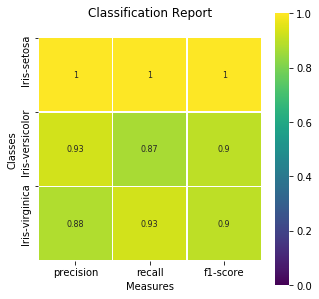

In [102]:
classification_report_plot( y_test, y_pred)

So, class setosa has perfect metrics whereas for class versicolor & virginica, they are not perfect. Still these values are very good.

Precision of versicolor is 0.93, means that 93% of the predicted values are versicolor & recall is 0.87, means that 87% of the actual values are correctly predicted as versicolor.

The next function plots the __ROC( Receiver Operating Chracteristic) Curve__, which gives you a better picture of sensitivity & specificity across different thresholds. __Specificity__ is the true negatives out of actual negatives.

Optimal threshold is the point where TPR & FPR are highest together.

This function also plots the __Precision-Recall Curve__, which gives you a better picture of precision & recall across different thresholds.

In [52]:
def plots_model(y_test,y_pred_proba):
    import scikitplot as skplt
    # -----------------------    ROC CURVE   -----------------------------
    skplt.metrics.plot_roc(y_test, y_pred_proba)
    plt.show()

    
    # -----------------------    PRECISION RECALL CURVE   -----------------------------
    skplt.metrics.plot_precision_recall(y_test, y_pred_proba)
    plt.show()

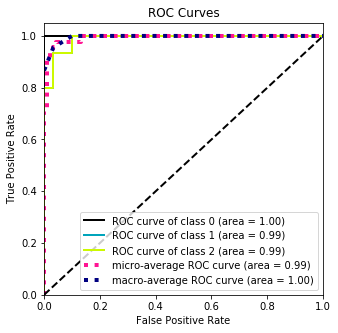

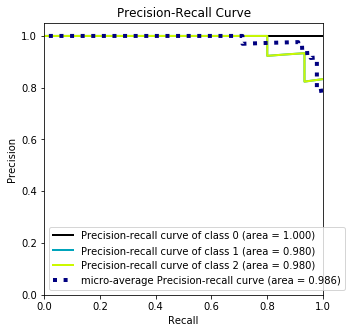

In [53]:
plots_model(y_test, y_pred_proba)

## <font color = 'dark pink'> Let us try improving the model

## Lets try GridSearchCV with logistic regression

__Hyperparameters__ are the parameters that cant be explicitly learned by fitting the model but changing them can change model performance a lot.

And if they cannot be learnt, how do we identify which value to give as hyperparameter. We dont. We pass multiple values to python & python runs the model through all these values & then selects the hyperparameter which gives the best results. This is done through __GridSearchCV( )__ in sklearn.It performs __k-fold cross validation__ for each permutation & combination of the hyperparamters.

In k fold cross validation, we divide the dataset into k splits & divide each split into k folds. Then we train the model on k-1 folds & test on kth fold. We rpeat this for all splits. Then we take an average of the model performance. This way the model is not dependent to the way the data splits.

It is any day better than the trial and error method of hyperparameter selection that we otherwise do.

In [54]:
from sklearn.model_selection import GridSearchCV

We create a grid of hyperparameters, that we want to pass to the model. The list of hyperparameters for each model is provided in sklearn documentation.

Here, we are going to specify __C parameter__( smaller values signify stronger regulation) & __penalty__ paramaters( _l1_, _l2_, _elasticnet_, _none_).

In [108]:
param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge

In [109]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

In [111]:
warnings.filterwarnings("ignore")
logreg_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ,
       1000.   ]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

By default, GridSearch CV( ) refits the best model & can be directly used for prediction.

In [103]:
y_pred = logreg_cv.predict(x_test)
logreg_cv.best_params_

{'C': 10.0, 'penalty': 'l2'}

Out of the parameter grid, the best hypperparameters came out to be C = 10, & penalty = l2

In [62]:
accuracy_score(y_test,y_pred)

0.9555555555555556

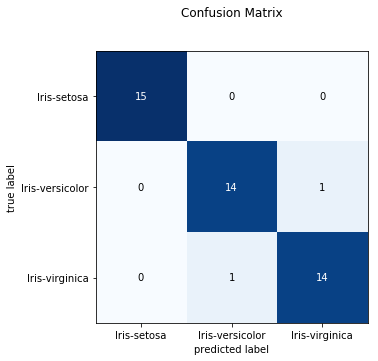

In [105]:
confusion_plot(y_test, y_pred, class_labels)

CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



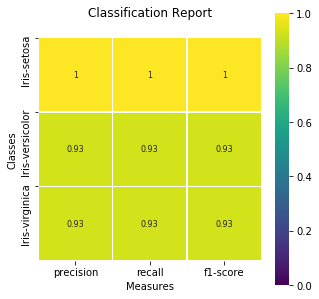

In [106]:
classification_report_plot( y_test, y_pred)

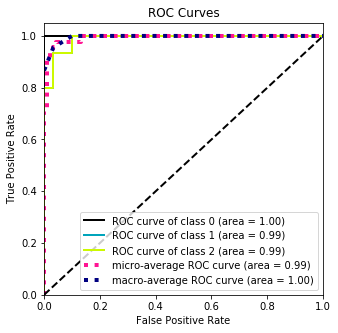

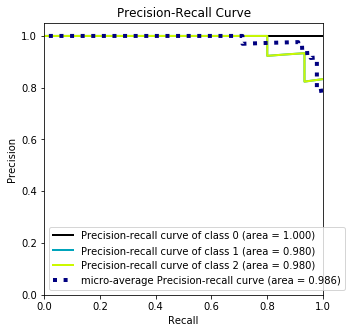

In [107]:
plots_model(y_test, y_pred_proba)

As can be seen above, the model accuracy, precision improved just by changing the models parameters.

But it is not always affordable to run GridSearchCV as it can be computationally expensive, so we turn to an alternative.

## Randomized Search CV

Instead of iterating through each and every parameter (GridSearchCV), RandomizedSearchCV randomly selects some parameters & then then run the algorithm with those parameters.

In [115]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge

In [116]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_rcv = RandomizedSearchCV(logreg,param_grid,cv=5)

In [117]:
warnings.filterwarnings("ignore")
logreg_rcv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ,
       1000.   ]), 'penalty': ['l1', 'l2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [118]:
y_pred = logreg_rcv.predict(x_test)
logreg_rcv.best_params_

{'penalty': 'l2', 'C': 100.0}

In [119]:
accuracy_score(y_test,y_pred)

0.9555555555555556

### Plotting the results

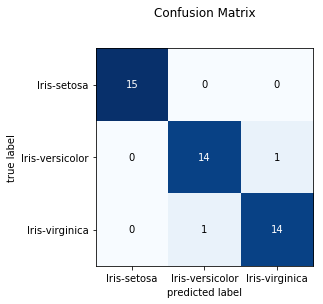

In [57]:
confusion_plot(y_test, y_pred, class_labels)

CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



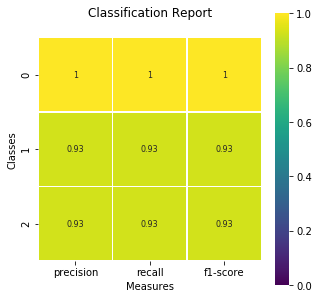

In [66]:
classification_report_plot( y_test, y_pred)

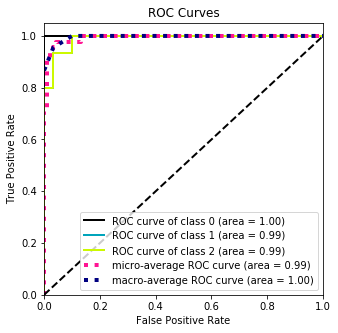

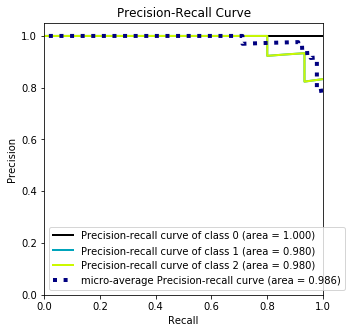

In [69]:
plots_model(y_test, y_pred_proba)

## <font color = 'dark pink'>Lets try another classification algorithm

## ------------------------------------ Decision Tree -----------------------------------------

In [121]:
from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier()
dtclf.fit(x_train, y_train)
y_pred = dtclf.predict(x_test)
Y_pred_proba = dtclf.predict_proba(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9333333333333333

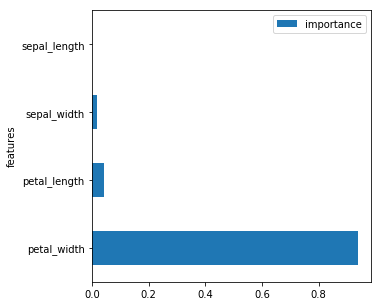

In [126]:
feat_imp_df=pd.DataFrame({'features':x_train.columns,'importance':dtclf.feature_importances_})
feat_imp_df=feat_imp_df.sort_values('importance',ascending=False).set_index('features')
feat_imp_df.plot.barh()

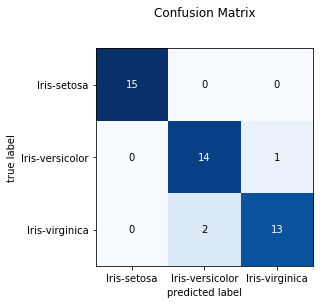

In [33]:
confusion_plot(y_test, y_pred, class_labels)

CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



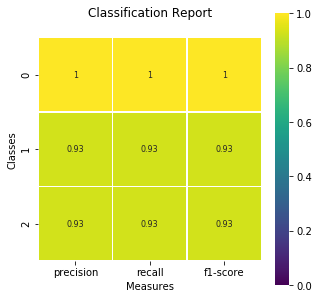

In [67]:
classification_report_plot( y_test, y_pred)

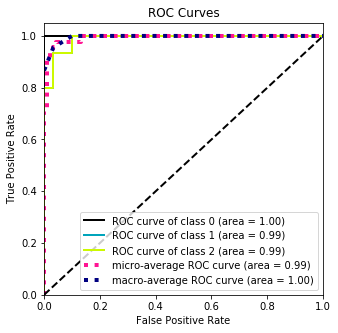

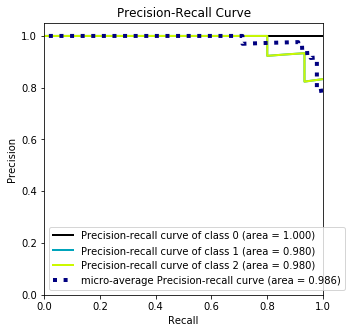

In [70]:
plots_model(y_test, y_pred_proba)

## Lets try GridSearchCV with Decision Tree

In [60]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier()
dtclf_cv = GridSearchCV(dtclf,param_grid,cv=5)

In [65]:
# warnings.filterwarnings("ignore")
dtclf_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
y_pred = dtclf_cv.predict(x_test)

In [67]:
dtclf_cv.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [68]:
dtclf_cv.best_score_

0.9619047619047619

In [69]:
y_pred = dtclf_cv.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9333333333333333

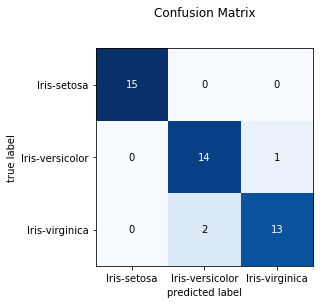

In [71]:
confusion_plot(y_test, y_pred, class_labels)

CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



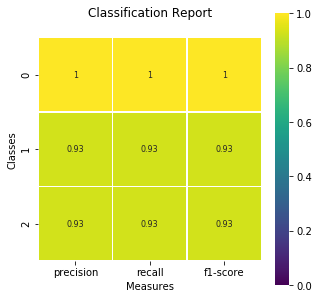

In [68]:
classification_report_plot( y_test, y_pred)

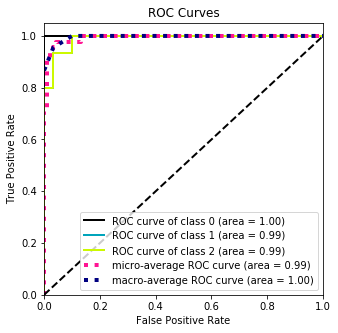

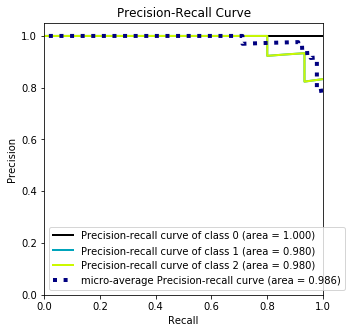

In [71]:
plots_model(y_test, y_pred_proba)